# MULTIPLE POLYNOMIAL REGRESSION

<b>The data set used is the data set containing the real estate market information. It includes the number of rooms, the age of the building, the number of floors, square meters, and the price information.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [83]:
df = pd.read_csv(r'D:\githubProjects\Machine-Learning\Supervised Learning\Model Regularization\real_estate')
df.head()

,Unnamed: 0,price,rooms,m2,floor,age
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [84]:
df.to_csv('real_estate.csv')

In [85]:
df.drop('Unnamed: 0',axis=1,inplace=True)

<b>Hold-Out

In [86]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


<b>Polynomial Degree Generating Function

In [87]:
from sklearn.preprocessing import PolynomialFeatures

<b>We create the polynomial degrees of the features from the second order to the tenth order and calculate the error score of the model created with each polynomial degree. Here we use RMSE as the error score.

In [88]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

<b>The R2 measure can be overly sensitive when it comes to polynomial functions. Therefore, RMSE is widely used for error score when Grid Search is done to determine the appropriate polynomial degree.

<b>Train set Features

In [89]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

In [90]:
print(f'Best Model RMSE :{min_rmse} degree :{min_deg}')

Best Model RMSE :56.48843719880914 degree :2


<b>RMSE scores for all polynomial values on the graph

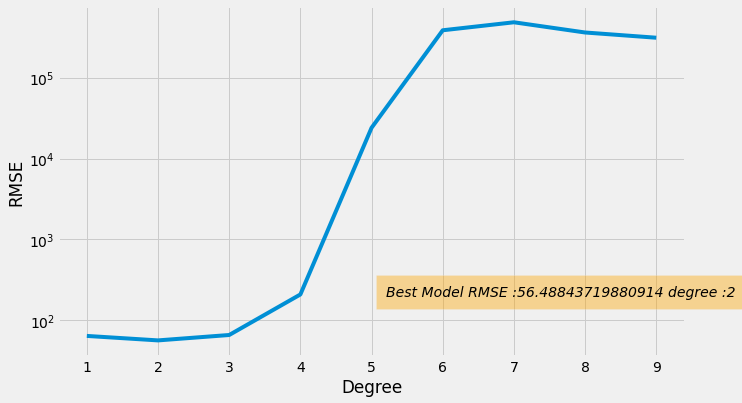

In [95]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(degrees,rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.text(5.2,200,(f'Best Model RMSE :{min_rmse} degree :{min_deg}'),style='italic',
         bbox={'facecolor' : 'orange', 'alpha' : 0.4, 'pad' : 10})
plt.show()